<a href="https://colab.research.google.com/github/yousefsersy/Project-2/blob/main/Project_2_S%26P_500_Currency_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#Imports
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from datetime import datetime

# Step 1: Data Collection

In [2]:
# Set the date range for the data
start_date = "2019-05-01"
end_date = "2024-05-01"

In [3]:
# Download historical data for S&P 500 ETF (e.g., SPY)
spy = yf.download("SPY", start=start_date, end=end_date)

# Download historical exchange rate data for EUR/USD and JPY/USD
eur_usd = yf.download("EURUSD=X", start=start_date, end=end_date)
jpy_usd = yf.download("JPYUSD=X", start=start_date, end=end_date)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


# Step 2: Data Preprocessing - Cleaning & Organizing the Data

In [4]:
# Keep only the 'Adj Close' columns
spy = spy[['Adj Close']].rename(columns={'Adj Close': 'SPY'})
eur_usd = eur_usd[['Adj Close']].rename(columns={'Adj Close': 'EUR/USD'})
jpy_usd = jpy_usd[['Adj Close']].rename(columns={'Adj Close': 'JPY/USD'})

# Combine the data into a single DataFrame
data = spy.join([eur_usd, jpy_usd], how='inner')

data.head()


,SPY,EUR/USD,JPY/USD
Date,,,
2019-05-01,268.404205,1.121604,0.008977
2019-05-02,267.824707,1.120084,0.008972
2019-05-03,270.446198,1.117356,0.008969
2019-05-06,269.333313,1.118581,0.009040
2019-05-07,264.835480,1.120185,0.009025


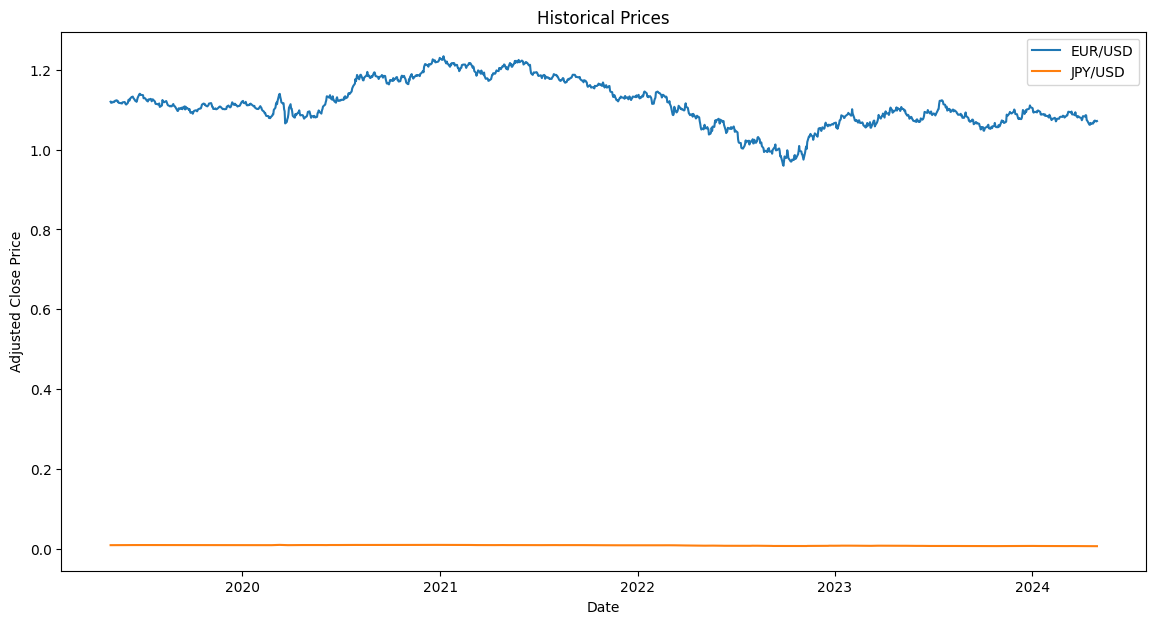

In [22]:
# Plot historical prices
plt.figure(figsize=(14, 7))
plt.plot(data['EUR/USD'], label='EUR/USD')
plt.plot(data['JPY/USD'], label='JPY/USD')
plt.title('Historical Prices')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

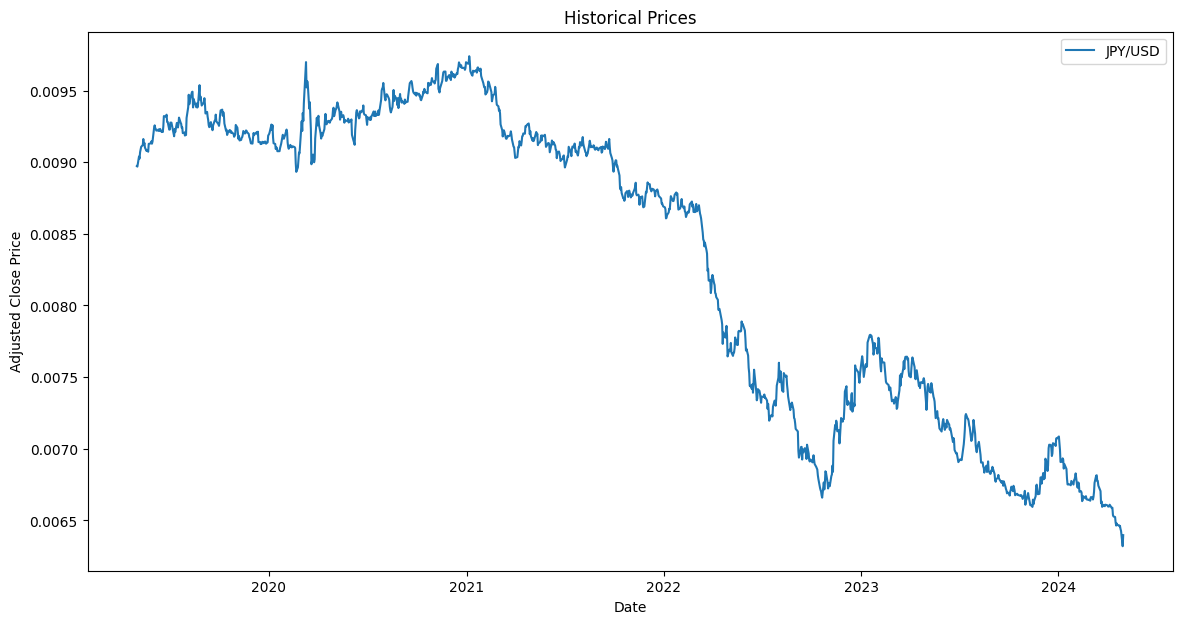

In [21]:
# Plot the JPY/USD to see flucutation
plt.figure(figsize=(14, 7))
plt.plot(data['JPY/USD'], label='JPY/USD')
plt.title('Historical Prices')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

In [5]:
#Create percentage change columns
data['SPY_pct_change'] = data['SPY'].pct_change()
data['EUR/USD_pct_change'] = data['EUR/USD'].pct_change()
data['JPY/USD_pct_change'] = data['JPY/USD'].pct_change()

# Create signals: 1 if SPY goes up, 0 otherwise
data['SPY_direction'] = data['SPY_pct_change'].apply(lambda x: 1 if x > 0 else 0)

# Drop NaN values
data.dropna(inplace=True)

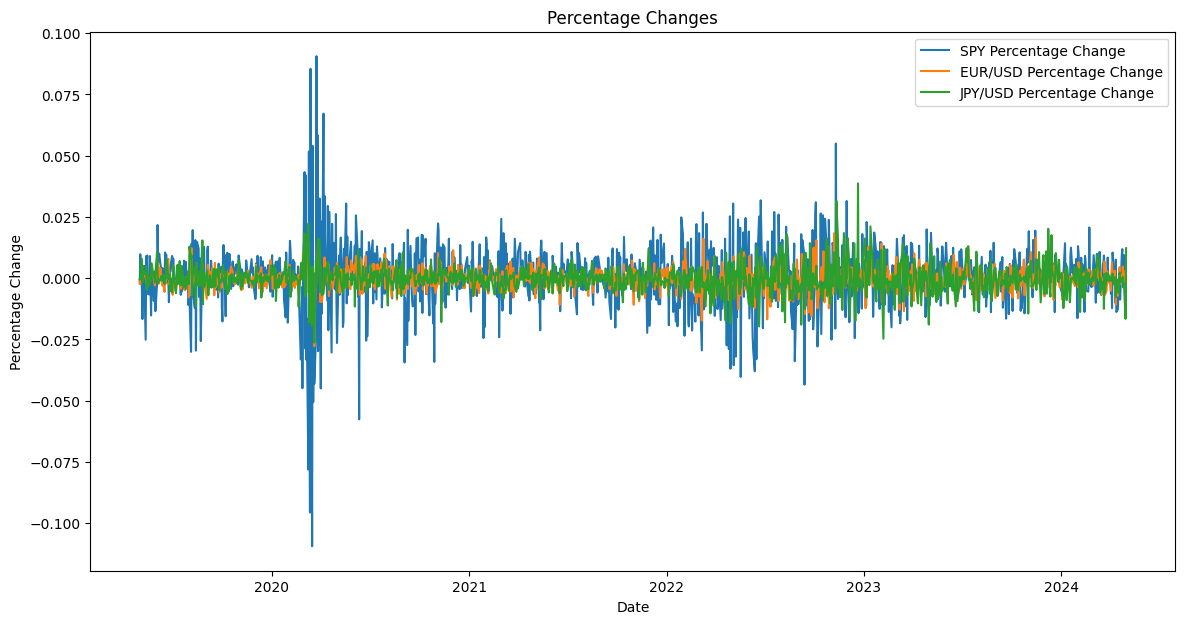

In [14]:
# Plot percentage changes
plt.figure(figsize=(14, 7))
plt.plot(data['SPY_pct_change'], label='SPY Percentage Change')
plt.plot(data['EUR/USD_pct_change'], label='EUR/USD Percentage Change')
plt.plot(data['JPY/USD_pct_change'], label='JPY/USD Percentage Change')
plt.title('Percentage Changes')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend()
plt.show()


# Step 3: Model Training and Evaluation

In [6]:
# Define features and target
X = data[['EUR/USD', 'JPY/USD', 'EUR/USD_pct_change', 'JPY/USD_pct_change']]
y = data['SPY_direction']

In [7]:
# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [8]:
# Split the balanced data: 60% for training and 40% for testing
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.4, random_state=42)

# Train a Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Train a Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predict on the test set
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

In [9]:
# Calculate accuracy for both models
lr_accuracy = accuracy_score(y_test, lr_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Logistic Regression accuracy: {lr_accuracy:.2f}")
print(f"Random Forest accuracy: {rf_accuracy:.2f}")

# Classification report for both models
lr_class_report = classification_report(y_test, lr_pred, zero_division=0)
rf_class_report = classification_report(y_test, rf_pred, zero_division=0)
print("Logistic Regression Classification Report:")
print(lr_class_report)
print("Random Forest Classification Report:")
print(rf_class_report)


Logistic Regression accuracy: 0.52
Random Forest accuracy: 0.50
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.72      0.60       268
           1       0.55      0.32      0.41       276

    accuracy                           0.52       544
   macro avg       0.53      0.52      0.50       544
weighted avg       0.53      0.52      0.50       544

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.55      0.52       268
           1       0.51      0.46      0.48       276

    accuracy                           0.50       544
   macro avg       0.50      0.50      0.50       544
weighted avg       0.50      0.50      0.50       544



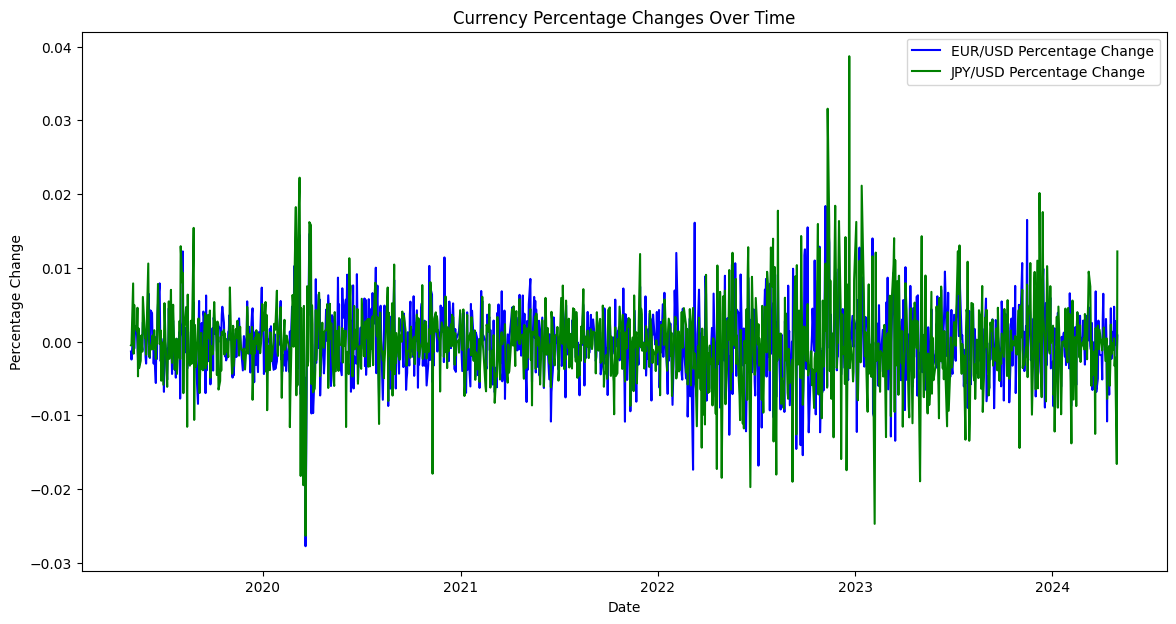

In [15]:
# Plot model performance with line plot
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['EUR/USD_pct_change'], label='EUR/USD Percentage Change', color='blue')
plt.plot(data.index, data['JPY/USD_pct_change'], label='JPY/USD Percentage Change', color='green')
plt.title('Currency Percentage Changes Over Time')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend()
plt.show()

# Step 4: Predict Future Values

In [43]:

# Get user input for the date
input_date = input("Enter the date (YYYY-MM-DD) to predict: ")
input_date = datetime.strptime(input_date, "%Y-%m-%d")

# Fetch the historical data for the input date
historical_data = yf.download(["EURUSD=X", "JPYUSD=X"], start=input_date, end=input_date + pd.Timedelta(days=1))

# Extract the necessary values
current_eur_usd = historical_data['Adj Close']['EURUSD=X'].iloc[0]
current_jpy_usd = historical_data['Adj Close']['JPYUSD=X'].iloc[0]

# Calculate the percentage changes
previous_data = data.loc[data.index < input_date].iloc[-1]
recent_eur_usd_pct_change = (current_eur_usd - previous_data['EUR/USD']) / previous_data['EUR/USD']
recent_jpy_usd_pct_change = (current_jpy_usd - previous_data['JPY/USD']) / previous_data['JPY/USD']
new_data = pd.DataFrame({
    'EUR/USD': [current_eur_usd],
    'JPY/USD': [current_jpy_usd],
    'EUR/USD_pct_change': [recent_eur_usd_pct_change],
    'JPY/USD_pct_change': [recent_jpy_usd_pct_change]
})

# Predict future values
lr_future_pred = lr_model.predict(new_data)
rf_future_pred = rf_model.predict(new_data)
print(f"Logistic Regression future prediction: {'Up' if lr_future_pred[0] == 1 else 'Down'}")
print(f"Random Forest future prediction: {'Up' if rf_future_pred[0] == 1 else 'Down'}")

# Determine which currency to use based on the prediction
if lr_future_pred[0] == 1 and rf_future_pred[0] == 1:
    print("Both models predict the S&P 500 will go up. Consider using EUR or JPY based on the most favorable exchange rate.")
elif lr_future_pred[0] == 1:
    print("Logistic Regression predicts the S&P 500 will go up. Consider using EUR.")
elif rf_future_pred[0] == 1:
    print("Random Forest predicts the S&P 500 will go up. Consider using JPY.")
else:
    print("Both models predict the S&P 500 will not go up. Consider holding off on purchasing.")

Enter the date (YYYY-MM-DD) to predict: 2023-06-21


[*********************100%%**********************]  2 of 2 completed

Logistic Regression future prediction: Down
Random Forest future prediction: Up
Random Forest predicts the S&P 500 will go up. Consider using JPY.
